# **Mid-Term Summative Assessment — Data Science Fundamentals**

- **Duration:** approx 1-3 hours per exercise (5-15 hours of work)
- **Format:** Individual coursework, submitted via Cortex and GitHub
- **Weight:** 30% of module grade
- **Dataset:** `attendance_anonymised.csv`

---

### 🎯 **Learning Outcomes**

By completing this assessment, you will demonstrate your ability to:

* Manage a Python data-science project using Git and GitHub.
* Import, clean, and transform a real-world dataset using `pandas`.
* Visualise data using `matplotlib`/`seaborn`.
* Build and run a simple interactive app with `pyShiny`.
* Perform and interpret a basic statistical analysis (correlation or regression).

### **💡 Tips**

* Always work from an **active virtual environment**.
* Keep your notebook clean and readable.
* Commit after each week’s exercise (recommended but not marked)
* Use `requirements.txt` to ensure reproducibility.

## 📘 Instructions

### **Exercise 1 — Project Setup (Version Control & Environment)**


1. Go to github.com and create a **new empty GitHub repository** on your Github account (no README, .gitignore, or license). 
   > *!Ensure the repo is public.*
2. Copy the repository URL and paste it below

   https://github.com/Belmiro42/Summative1LIS.git



3. In your terminal, navigate to a local folder and run `git clone`:

   ```bash
   cd ./datascience2025/ 
   git clone <your_repo_url>
   ```
   > Tips: 
   > 1. Replace `./datascience2025/` with a local path of your choice
   > 2. replace <your_repo_url> with the url you copied from Github, e.g. https://github.com/user/repo-url. 
   
   This command will download the remote Github repo to the local path. It will create a folder on your machine (e.g. `./datascience2025/<assessment_project_repo>/`) linked to the remote folder on Github.
4. Inside this folder, create:

   * `requirements.txt` — include all packages needed for the project (you may copy the one used in class).
   * `README.md` — write exactly:

     ```
     Hello world! I love summative assessments.
     ```
5. Stage and commit both files:

   ```bash
   git add .
   git commit -m "Initial commit with requirements and readme. I really love summatives."
   git push
   ```
   > If you prefer using the VS Code user interface to push your commit, please feel free. 

✅ **Checkpoint:** Refresh your repository on GitHub. It should show both files.



### **Exercise 2 — Data Cleaning & Exploration**


In [357]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr




1. Load `attendance_anonymised.csv` using `pandas`.



In [291]:
attendance_anonymised = pd.read_csv("./attendance_anonymised.csv")

2. Describe the dataset using inbuilt functions such as `.head()`, `.info()`, `.describe()`.


In [292]:
# Describes the distribution of values within columns. At the moment not too useful for any code.
attendance_anonymised.describe()

,Person Code,Unit Instance Code,Calocc Code,Register Event ID,Object ID,Register Event Slot ID,Postive Marks,Negative Marks
count,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000
mean,258.244473,1252.674016,2023.913212,495.752536,504.818742,572.408139,0.716531,0.732892
std,146.904888,530.609058,0.774686,292.031166,275.174454,313.946746,0.450695,0.442462
min,1.000000,4.000000,2023.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,146.000000,840.000000,2023.000000,223.000000,267.000000,297.000000,0.000000,0.000000
50%,265.000000,1306.000000,2024.000000,515.000000,504.000000,574.000000,1.000000,1.000000
75%,384.000000,1749.000000,2025.000000,788.000000,733.000000,839.000000,1.000000,1.000000
max,498.000000,1945.000000,2025.000000,984.000000,984.000000,1124.000000,1.000000,1.000000


In [293]:
# Tells us datatypes of each column
attendance_anonymised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Person Code             17053 non-null  int64 
 1   Unit Instance Code      17053 non-null  int64 
 2   Calocc Code             17053 non-null  int64 
 3   Surname                 17053 non-null  object
 4   Forename                17053 non-null  object
 5   Long Description        17053 non-null  object
 6   Register Event ID       17053 non-null  int64 
 7   Object ID               17053 non-null  int64 
 8   Register Event Slot ID  17053 non-null  int64 
 9   Planned Start Date      17053 non-null  object
 10  Planned End Date        17053 non-null  object
 11  is Positive             17038 non-null  object
 12  Postive Marks           17053 non-null  int64 
 13  Negative Marks          17053 non-null  int64 
 14  Usage Code              17038 non-null  object
dtypes:

3. Drop the `Planned End Date` column.


In [294]:
attendance_anonymised = attendance_anonymised.drop(columns="Planned End Date")

4. Rename the columns exactly as follows:

   | Old                    | New             |
   | ---------------------- | --------------- |
   | Person Code            | Person Code     |
   | Unit Instance Code     | Module Code     |
   | Calocc Code            | Year            |
   | Surname                | Surname         |
   | Forename               | Forename        |
   | Long Description       | Module Name     |
   | Register Event ID      | Event ID        |
   | Object ID              | Object ID       |
   | Register Event Slot ID | Event Slot ID   |
   | Planned Start Date     | Date            |
   | is Positive            | Has Attended    |
   | Postive Marks          | Attended        |
   | Negative Marks         | NotAttended     |
   | Usage Code             | Attendance Code |



In [295]:
attendance_anonymised.rename(columns={"Unit Instance Code": "Module Code"},         inplace=True)
attendance_anonymised.rename(columns={"Calocc Code": "Year"},                       inplace=True)
attendance_anonymised.rename(columns={"Long Description": "Module Name"},           inplace=True)
attendance_anonymised.rename(columns={"Register Event Slot ID": "Event Slot ID"},   inplace=True)
attendance_anonymised.rename(columns={"Planned Start Date": "Date"},                inplace=True)
attendance_anonymised.rename(columns={"is Positive": "Has Attended"},               inplace=True)
attendance_anonymised.rename(columns={"Psoitive Marks": "Attended"},                inplace=True)
attendance_anonymised.rename(columns={"Negative Marks": "Not Attended"},            inplace=True)
attendance_anonymised.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Person Code        17053 non-null  int64 
 1   Module Code        17053 non-null  int64 
 2   Year               17053 non-null  int64 
 3   Surname            17053 non-null  object
 4   Forename           17053 non-null  object
 5   Module Name        17053 non-null  object
 6   Register Event ID  17053 non-null  int64 
 7   Object ID          17053 non-null  int64 
 8   Event Slot ID      17053 non-null  int64 
 9   Date               17053 non-null  object
 10  Has Attended       17038 non-null  object
 11  Postive Marks      17053 non-null  int64 
 12  Not Attended       17053 non-null  int64 
 13  Usage Code         17038 non-null  object
dtypes: int64(8), object(6)
memory usage: 1.8+ MB


5. Convert `Date` to a pandas timestamp. 
   > tip: use `pd.to_datetime()`

In [296]:
attendance_anonymised['Date'] = pd.to_datetime(attendance_anonymised['Date'])
attendance_anonymised['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17053 entries, 0 to 17052
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
17053 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 133.4 KB


6. Filter the DataFrame on **one specific module** (your choice) and plot its **attendance rate over time**
   (x = Date, y = the module's average attendance).



In [297]:
print("Remove \"~\" values")
attendance_anonymised = attendance_anonymised[attendance_anonymised['Has Attended'] != "~"]

attendance_anonymised_history = attendance_anonymised[attendance_anonymised['Module Name'] == 'History']
attendance_anonymised_history["Has Attended"].unique()

Remove "~" values


array(['N', 'Y'], dtype=object)

In [298]:
attendance_anonymised_history["Has Attended"].unique()
attendance_anonymised_history

,Person Code,Module Code,Year,Surname,Forename,Module Name,Register Event ID,Object ID,Event Slot ID,Date,Has Attended,Postive Marks,Not Attended,Usage Code
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A
5,280,1266,2025,Lim,Michael,History,295,726,735,2025-08-02,N,0,0,A
6,280,1266,2023,Lim,Michael,History,295,726,271,2023-07-02,N,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16655,416,1266,2025,Rossi,Daniel,History,846,658,457,2025-07-03,Y,1,1,P
16656,346,1266,2025,Reddy,Hana,History,846,880,457,2025-07-03,Y,1,1,L
16657,160,1266,2025,Nair,Lisa,History,846,418,457,2025-07-03,N,0,0,A
16658,160,1266,2023,Nair,Lisa,History,846,418,776,2023-12-27,Y,1,1,P


In [299]:
attendance_anonymised_history_table = (attendance_anonymised_history.groupby("Date")["Not Attended"].mean().reset_index())
attendance_anonymised_history_table

,Date,Not Attended
0,2023-01-08,0.533333
1,2023-01-20,0.500000
2,2023-06-04,0.517241
3,2023-06-29,0.517241
4,2023-07-02,0.400000
5,2023-07-20,0.758621
6,2023-11-11,0.620690
7,2023-11-12,0.566667
8,2023-12-27,0.366667
9,2024-01-23,0.413793


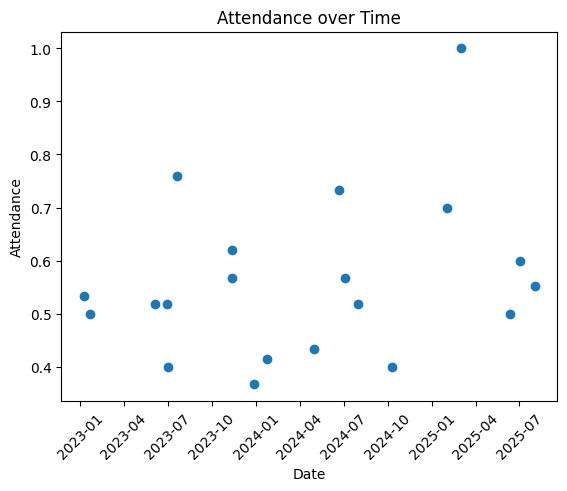

In [300]:
plt.scatter(attendance_anonymised_history_table["Date"], attendance_anonymised_history_table["Not Attended"])
plt.title("Attendance over Time")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation=45) 
plt.show()

7. **[For L6 students only]** Add a column, titled "Student Overall Attendance", with the average attendance for the student. Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance".

In [301]:
student_attendance_avg = (attendance_anonymised.groupby("Person Code")["Not Attended"].mean().reset_index())

student_attendance_avg.rename(columns={"Not Attended": "Student Overall Attendance"},            inplace=True)
student_attendance_avg["Standardised Student Overall Attendance"] = (student_attendance_avg["Student Overall Attendance"] - student_attendance_avg["Student Overall Attendance"].mean())/ student_attendance_avg["Student Overall Attendance"].std()
student_attendance_avg

,Person Code,Student Overall Attendance,Standardised Student Overall Attendance
0,1,0.649254,-0.585111
1,2,0.704545,-0.327284
2,3,0.928571,0.717356
3,7,0.414201,-1.681167
4,10,1.000000,1.050429
...,...,...,...
169,482,0.894737,0.559584
170,490,0.597315,-0.827300
171,491,0.964912,0.886814
172,496,0.904412,0.604699


In [302]:
attendance_anonymised = attendance_anonymised.merge(student_attendance_avg, on="Person Code", how="left")
attendance_anonymised

,Person Code,Module Code,Year,Surname,Forename,Module Name,Register Event ID,Object ID,Event Slot ID,Date,Has Attended,Postive Marks,Not Attended,Usage Code,Student Overall Attendance,Standardised Student Overall Attendance
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,0.875000,0.467551
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,0.875000,0.467551
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,0.216216,-2.604377
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,0.216216,-2.604377
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,0.216216,-2.604377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16784,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,N,0,0,A,0.511494,-1.227487
16785,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,Y,1,1,P,0.973118,0.925079
16786,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,N,0,0,A,0.776596,0.008689
16787,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,Y,1,1,P,0.978610,0.950685


✅ **Checkpoint:** Cleaned DataFrame and a line or bar plot of attendance over time for one module.

---



### **Exercise 3 — Make it Shiny**



1. Create a file called `app.py`.
2. Build a minimal Shiny app that only displays the plot you created in the previous exercise.
3. Run the app locally using this terminal command:

   ```bash
   shiny run --reload --launch-browser app.py
   ```
   > if your terminal is not in the same folder where the `app.py` file is, you will need to specify the correct path, e.g. `shiny run --reload --launch-browser /path/to/my/app.py`

4. **[For L6 students only]** Enhance the app with a title and at least one more UI element. E.g., you could enhance the app with interactivity (e.g. allow the user to select the module to plot).

✅ **Checkpoint:** The app runs without errors and displays the plot from Exercise 2 in a browser.

---

### **Exercise 4 — Comparing Modules**



1. Compute the **mean** and **standard deviation** of attendance per module using pandas `groupby`. Consult the documentation if needed.


In [303]:
attendance_stats = attendance_anonymised.groupby('Module Name')['Not Attended'].agg(['mean', 'std', 'count']).reset_index()
attendance_stats

,Module Name,mean,std,count
0,Algorithms,0.753327,0.431266,1127
1,Arabic,0.768519,0.422105,648
2,Arts & Crafts,0.614504,0.487644,262
3,Biology,0.626582,0.484479,316
4,Biomedical Engineering,0.650000,0.483046,40
5,Business Intelligence,0.792208,0.408388,77
6,Chemistry,0.686441,0.464596,354
7,Cloud Computing,0.852211,0.355082,927
8,Creative Writing,0.967105,0.178951,152
9,Cybersecurity,0.960000,0.196261,325


2. Create a `seaborn.barplot` of mean attendance per module with 95% confidence intervals.


<Axes: xlabel='Module Name', ylabel='mean'>

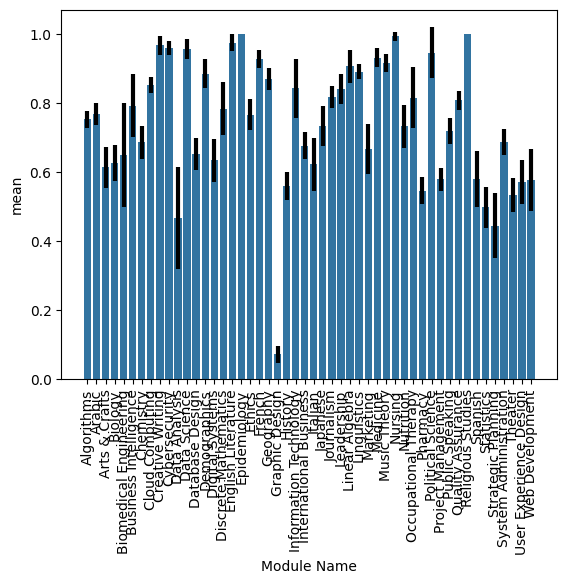

In [304]:
attendance_stats['95'] = attendance_stats["std"] * 1.96 /  attendance_stats['count'].pow(0.5)
graph = sns.barplot(data=attendance_stats, x="Module Name", y="mean")
graph.errorbar(data=attendance_stats, x='Module Name', y='mean', yerr='95', ls='', lw=3, color='black')
graph.tick_params(axis='x', rotation=90)
graph

3. Write a short interpretation (2–3 sentences) explaining what the plot and error bars show.

    The plot shows the average attendange for each module.
    The error bars show where 95% of the population falls.
    Larger bars show larger diversity of values  (or smaller population sizes)
    Smaller bars show smaller diversity of values (or small population sizes with similar values)
    No error bar means every attendant had the same average attendance (most likely one attendant)

✅ **Checkpoint:** My notebook and/or my Shiny app show a barplot with error bars, one bar per module (x-axis), where the height of the bar is the module's attendance rate (y-axis).

---



### **Exercise 5 — Attendance Relationships**



1. Answer the question: **Do students with low overall attendance tend to attend modules that have low attendance?**.


3. **[For L6 students only]** Run both correlation analysis and linear regression analysis to answer the same question. Do they tell the same story?

> Tips:
> 1. Compute the mean attendance rate of each module. Can you re-use some of the `groupby` code you wrote above?
> 2. For each module, compute the average overall attendance of the students who attended that module.

> 3. Correlation and linear regression can both help you answer the question. 
> 4. Report main statistic and p-value(s).


In [305]:
# Student Name | Average Attendance | STD | Average of The Average of Class Attendances For All Modules Taken
unique_pairs = attendance_anonymised[['Person Code', 'Module Name']].drop_duplicates().merge(attendance_stats, on='Module Name', how='left')
unique_pairs

,Person Code,Module Name,mean,std,count,95
0,129,Nursing,0.993333,0.081650,150,0.013067
1,129,Italian,0.622517,0.486371,151,0.077577
2,280,History,0.559865,0.496822,593,0.039988
3,280,Arabic,0.768519,0.422105,648,0.032500
4,440,Database Design,0.653012,0.476586,415,0.045854
...,...,...,...,...,...,...
1002,193,Epidemiology,1.000000,0.000000,15,0.000000
1003,209,Epidemiology,1.000000,0.000000,15,0.000000
1004,32,Epidemiology,1.000000,0.000000,15,0.000000
1005,353,Epidemiology,1.000000,0.000000,15,0.000000


In [320]:
student_avg_of_avgs = unique_pairs.groupby('Person Code').agg(avg_mean=('mean', 'mean'), avg_count=('count', 'mean')).reset_index()
student_avg_of_avgs.rename(columns={"avg_mean": "Average of Class Attendance Averages", "avg_count": "Average Class Size"}, inplace=True)
student_avg_of_avgs = student_avg_of_avgs.merge(student_attendance_avg, on='Person Code', how='left')
student_avg_of_avgs 

,Person Code,Average of Class Attendance Averages,Average Class Size,Student Overall Attendance,Standardised Student Overall Attendance
0,1,0.726175,235.875,0.649254,-0.585111
1,2,0.735600,322.875,0.704545,-0.327284
2,3,0.885714,210.000,0.928571,0.717356
3,7,0.727492,682.125,0.414201,-1.681167
4,10,0.916821,477.750,1.000000,1.050429
...,...,...,...,...,...
169,482,0.913439,311.000,0.894737,0.559584
170,490,0.737349,318.375,0.597315,-0.827300
171,491,0.913439,311.000,0.964912,0.886814
172,496,0.665766,452.000,0.904412,0.604699


In [359]:
#CORRELATION

r, p = pearsonr(student_avg_of_avgs['Student Overall Attendance'], student_avg_of_avgs['Average of Class Attendance Averages'])
print("Correlation:", r)
print("p-value:", p)

Correlation: 0.5663476046469692
p-value: 3.8009929076815117e-16


In [ ]:

r, p = pearsonr(student_avg_of_avgs['Student Overall Attendance'], student_avg_of_avgs['Average of Class Attendance Averages'])
print("Correlation:", r)
print("p-value:", p)

new_graph = sns.scatterplot(data= student_avg_of_avgs, y="Average of Class Attendance Averages", x="Student Overall Attendance",  hue="Average Class Size", size="Average Class Size", marker="x")
new_graph

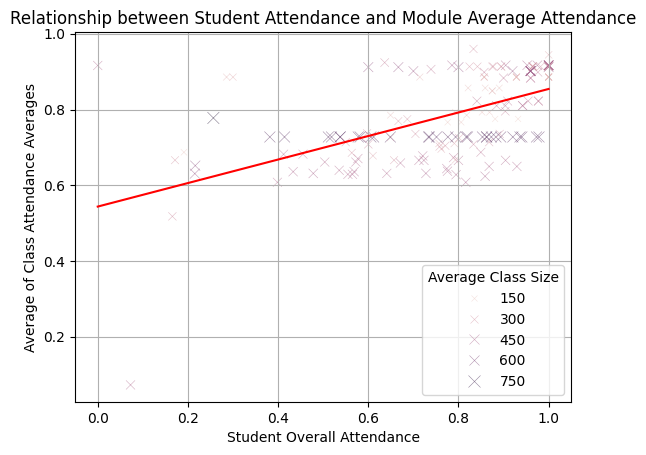

                                     OLS Regression Results                                     
Dep. Variable:     Average of Class Attendance Averages   R-squared:                       0.321
Model:                                              OLS   Adj. R-squared:                  0.317
Method:                                   Least Squares   F-statistic:                     81.22
Date:                                  Fri, 14 Nov 2025   Prob (F-statistic):           3.80e-16
Time:                                          16:36:07   Log-Likelihood:                 159.67
No. Observations:                                   174   AIC:                            -315.3
Df Residuals:                                       172   BIC:                            -309.0
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                              

In [358]:
#REGRESSION
x = student_avg_of_avgs['Student Overall Attendance']
y = student_avg_of_avgs['Average of Class Attendance Averages']

X = sm.add_constant(x) 
model = sm.OLS(y, X).fit()

X_plot = np.linspace(0, 1, 100)
Y_plot = model.params["Student Overall Attendance"]*X_plot+model.params["const"]

# Set figure size
sns.scatterplot(x=x, y=y, alpha=0.6, marker="x", size=student_avg_of_avgs["Average Class Size"], hue=student_avg_of_avgs["Average Class Size"])
plt.plot(X_plot, Y_plot, color='r')

plt.xlabel('Student Overall Attendance')
plt.ylabel('Average of Class Attendance Averages')
plt.title('Relationship between Student Attendance and Module Average Attendance')
plt.grid(True)
plt.show()

print(model.summary())

In [333]:
#BELS NOTES

# The correlation model suggests a significant positive ~(+0.56) relationship between 
# a students attendance and their average class attendance.

# The regression model suggests a modest ~(+0.3) relationship with a higher intercept.

# Both models are statitistically significant at p < 0.01


✅ **Checkpoint:** Table or printout showing correlation or regression results.

# THE END!